In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__3/data2022-05-03-20-59-24.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__10/data2022-05-03-23-12-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__4/data2022-05-03-21-44-08.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__5/data2022-05-03-22-28-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__1/data2022-05-03-19-19-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-05-03-23-12-46/tempsweep_radial_nodiff__2/

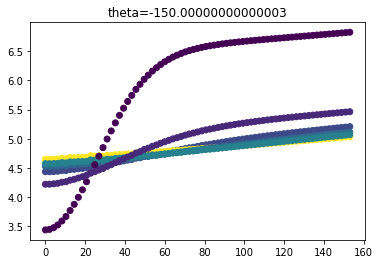

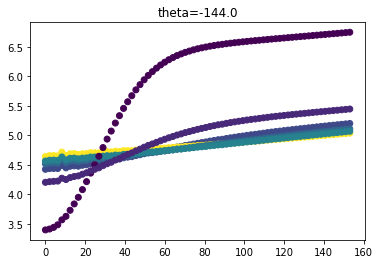

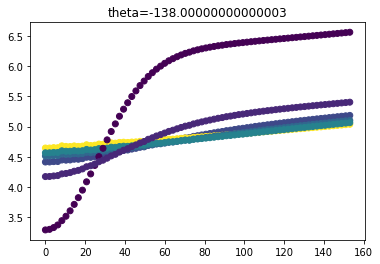

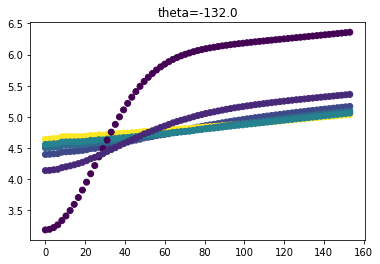

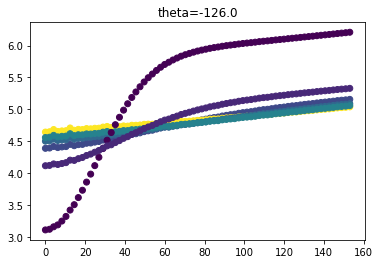

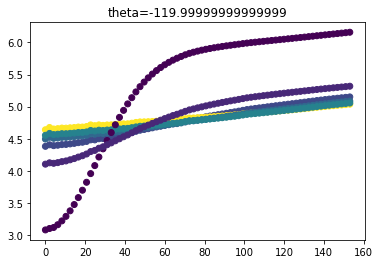

[ 3. 10.  4.  5.  1.  2.]


In [4]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'],df2['SE'], c=df2['T'] )
    plt.title('theta='+str(th*180/np.pi))
    plt.show()
    
print(tss)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


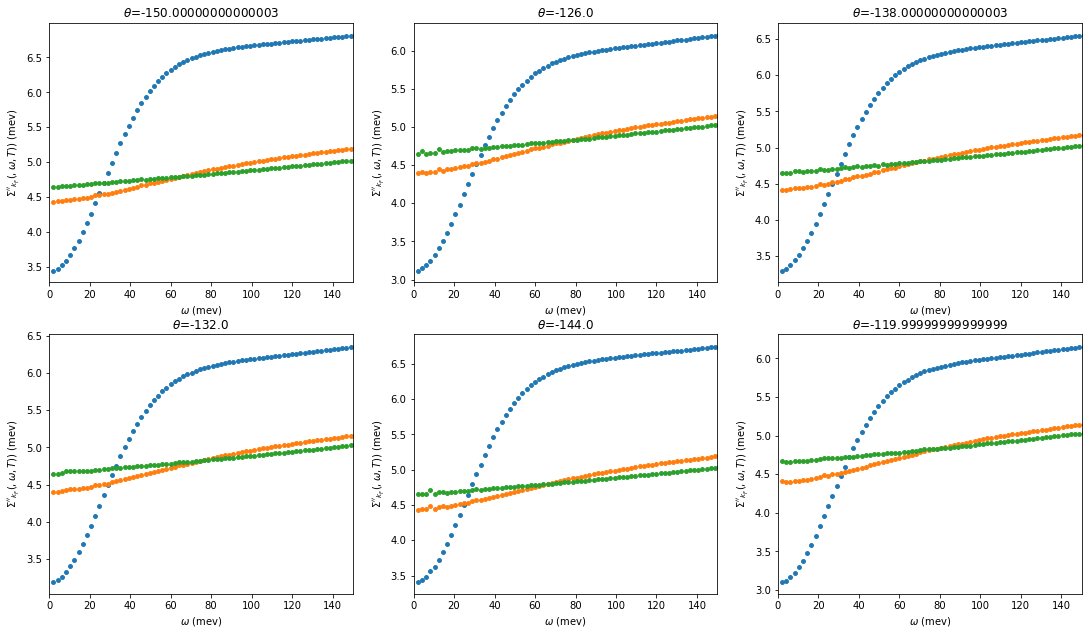

In [5]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"$\Sigma''_{k_F}(,\omega, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003
0 0 0


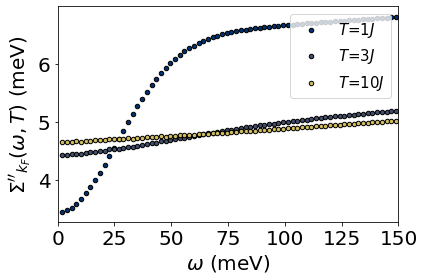

In [6]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(int(T))+r"$J$",s=20, color=plt.cm.cividis(T/12), zorder=T, edgecolor='k')
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=20)
    axis.set_xlabel(r"$\omega$ (meV)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()
plt.savefig("imgs/pap_fig2c", dpi=400)

-150.00000000000003
0 0 0
-119.99999999999999
0 0 0


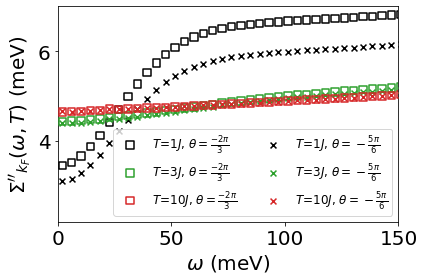

In [56]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
thetadeg=df['theta'].unique()[0]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
index={"1":0,"2":1,"3":2,"4":3,"5":4,"10":5}
csheme=['k',plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=\frac{-2\pi}{3}$",s=55, edgecolors=csheme[index[str(int(T))]], zorder=T, marker='s', facecolors="none",linewidth=1.5)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=20)
    axis.set_xlabel(r"$\omega$ (meV)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)


thets=[df['theta'].unique()[-1]]
thetadeg=df['theta'].unique()[-1]*180/np.pi
print(thetadeg)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,3.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=plt.cm.tab10(index[str(int(T))]), zorder=T, marker="x")
        axis.scatter(x[1::2],(y[1::2]) ,   label=r'$T$='+str(int(T))+r"$J$, $\theta=-\frac{5\pi}{6}$",s=35, color=csheme[index[str(int(T))]], zorder=T, marker="x")
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=20)
    axis.set_xlabel(r"$\omega$ (meV)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=3)
axis.legend(prop={'size': 12}, ncol=2)
plt.ylim([2.2,7])
    
    
plt.tight_layout()
plt.savefig("imgs/pap_fig2c", dpi=400)

In [ ]:
[plt.cm.tab10(9), plt.cm.tab10(0),plt.cm.tab10(2),plt.cm.tab10(1),plt.cm.tab10(4),plt.cm.tab10(3) ]